In [2]:
!wget https://github.com/younggon2/Education-ComputerVision-DeepLearning/raw/master/res/Lung_Segmentation.zip

--2021-06-07 07:52:42--  https://github.com/younggon2/Education-ComputerVision-DeepLearning/raw/master/res/Lung_Segmentation.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/younggon2/Education-ComputerVision-DeepLearning/master/res/Lung_Segmentation.zip [following]
--2021-06-07 07:52:43--  https://media.githubusercontent.com/media/younggon2/Education-ComputerVision-DeepLearning/master/res/Lung_Segmentation.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56097894 (53M) [application/zip]
Saving to: ‘Lung_Segmentation.zip’

Lung_Segmentation.z 100%[===================>]  53.

In [1]:
!unzip Lung_Segmentation.zip

unzip:  cannot find or open Lung_Segmentation.zip, Lung_Segmentation.zip.zip or Lung_Segmentation.zip.ZIP.


## 데이터 전처리

**Mask 이미지 생성**

In [ ]:
'''
import os
import numpy as np
import cv2

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

data_path = "./"

files = os.listdir(os.path.join(data_path, 'image'))
file_headers = []  #python list
for f in files:
    f1 = os.path.splitext(f)[0]
    file_headers.append(f1)
#print(file_headers)

X_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# y_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
y_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, 2), dtype=np.bool) # 좌/우를 분리하기 위해 mask의 channel 값을 2로 변경

count = 0
for fh in file_headers:
    f1 = os.path.join(data_path, 'image', '{}.png'.format(fh))
    l1 = os.path.join(data_path, 'label', '{}.png'.format(fh))
    
    img = imread(f1)[:,:,:IMG_CHANNELS]
    # mask = imread(l1)
    # mask = np.expand_dims(mask, axis=-1)
    mask = cv2.imread(l1, cv2.IMREAD_GRAYSCALE)
    mask_l = np.zeros(mask.shape, dtype=np.bool)
    mask_r = np.zeros(mask.shape, dtype=np.bool)

    mask_h = mask_r.shape[0]
    mask_w = mask_r.shape[1]

    cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

    cent_1 = centroids[1, 0] # 1번 ret 중심 x 좌표
    cent_2 = centroids[2, 0] # 2번 ret 중심 x 좌표

    if cent_1 < cent_2: # 1번 ret가 left lung 인경우
        for i in range(mask_h):
            for j in range(mask_w):
                if labels[i][j]== 1:
                    mask_l[i][j] = 1
                elif labels[i][j]== 2:
                    mask_r[i][j] = 1
    else: # 1번 ret가 right lung 인경우
        for i in range(mask_h):
            for j in range(mask_w):
                if labels[i][j]== 1:
                    mask_r[i][j] = 1
                elif labels[i][j]== 2:
                    mask_l[i][j] = 1

    for i in range(mask_h):
        for j in range(mask_w):
            y_all[count][i][j][0] = mask_r[i][j]
            y_all[count][i][j][1] = mask_l[i][j]

    X_all[count] = img
    # y_all[count] = mask
    
    count += 1
    '''

In [3]:
import os
import numpy as np
import cv2

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

data_path = "./"

files = os.listdir(os.path.join(data_path, 'image'))
file_headers = []  #python list
for f in files:
    f1 = os.path.splitext(f)[0]
    file_headers.append(f1)
#print(file_headers)

X_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# y_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
y_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, 2), dtype=np.bool) # 좌/우를 분리하기 위해 mask의 channel 값을 2로 변경

count = 0
for fh in file_headers:
    f1 = os.path.join(data_path, 'image', '{}.png'.format(fh))
    l1 = os.path.join(data_path, 'label', '{}.png'.format(fh))
    
    img = imread(f1)[:,:,:IMG_CHANNELS]
    # mask = imread(l1)
    # mask = np.expand_dims(mask, axis=-1)
    mask = cv2.imread(l1, cv2.IMREAD_GRAYSCALE)
    mask_ = np.zeros((mask.shape[1],mask.shape[0],2), dtype=np.bool)

    cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

    cent_1 = centroids[1, 0] # 1번 ret 중심 x 좌표
    cent_2 = centroids[2, 0] # 2번 ret 중심 x 좌표

    if cent_1 < cent_2: # 1번 ret가 left lung 인경우
        mat_[0][labels==1]=1
        mat_[1][labels==2]=1
    else: # 1번 ret가 right lung 인경우
        mat_[1][labels==1]=1
        mat_[0][labels==2]=1


    y_all[]
    for i in range(mask_h):
        for j in range(mask_w):
            y_all[count][i][j][0] = mask_r[i][j]
            y_all[count][i][j][1] = mask_l[i][j]

    X_all[count] = img
    # y_all[count] = mask
    
    count += 1

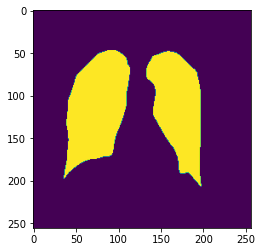

[0 1 2]


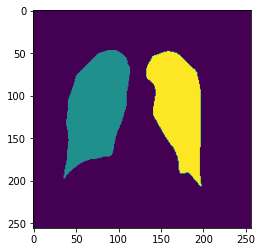

[  0 128 255]


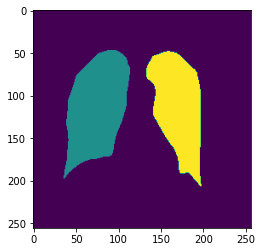

In [47]:
cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)
plt.imshow(mask)
plt.show()
print(np.unique(labels))
plt.imshow(labels)
plt.show()
mat_  = np.zeros((mask.shape[1],mask.shape[0]),dtype='uint8')
mat_[labels==1]=128
mat_[labels==2]=255
print(np.unique(mat_))
plt.imshow(mat_,vmin=0,vmax=255)
plt.show()

In [ ]:
'''
import os
import numpy as np

from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

data_path = "./"

files = os.listdir(os.path.join(data_path, 'image'))
file_headers = []  #python list
for f in files:
    f1 = os.path.splitext(f)[0]
    file_headers.append(f1)
#print(file_headers)

X_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
# y_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
y_all = np.zeros((len(file_headers), IMG_HEIGHT, IMG_WIDTH, 2), dtype=np.bool) # 좌/우를 분리하기 위해 mask의 channel 값을 2로 변경

count = 0
for fh in file_headers:
    f1 = os.path.join(data_path, 'image', '{}.png'.format(fh))
    l1 = os.path.join(data_path, 'label', '{}.png'.format(fh))
    
    img = imread(f1)[:,:,:IMG_CHANNELS]
    # mask = imread(l1)
    # mask = np.expand_dims(mask, axis=-1)
    mask_r = imread(l1)
    mask_l = imread(l1)

    img_h = mask_r.shape[0]
    img_w = mask_r.shape[1]

    for i in range(img_h):
        for j in range(int(img_w / 2)):
            mask_r[i][j] = 0          
            
    for i in range(img_h):
        for j in range(int(img_w / 2), img_w):
            mask_l[i][j] = 0

    for i in range(img_h):
        for j in range(img_w):
            y_all[count][i][j][0] = mask_r[i][j]
            y_all[count][i][j][1] = mask_l[i][j]

    X_all[count] = img
    # y_all[count] = mask
    
    count += 1
'''

In [4]:
X_all = X_all.astype('float32') / 255.
y_all = y_all.astype('float32')

**학습, 검증, 테스트 데이터 셋으로 분리**

In [5]:
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [6]:
print('X_train',X_train.shape)
print('X_valid',X_valid.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_valid',y_valid.shape)
print('y_test',y_test.shape)

X_train (361, 256, 256, 3)
X_valid (91, 256, 256, 3)
X_test (114, 256, 256, 3)
y_train (361, 256, 256, 2)
y_valid (91, 256, 256, 2)
y_test (114, 256, 256, 2)


**학습, 검증, 테스트 데이터 셋 확인**

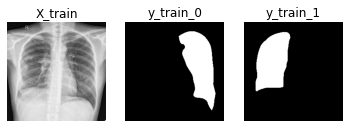

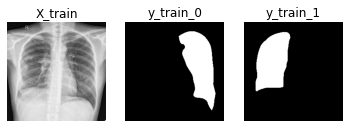

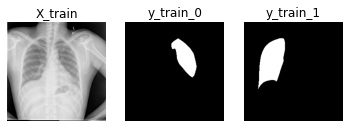

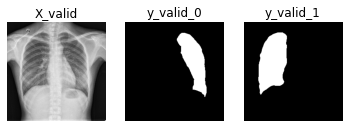

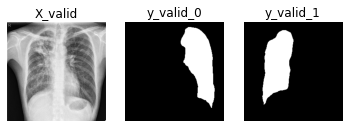

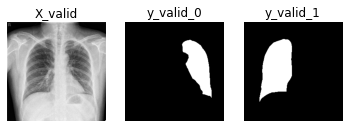

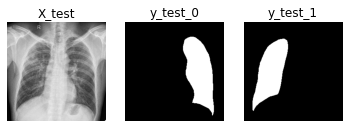

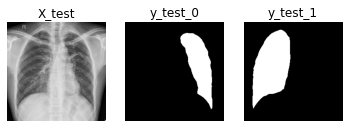

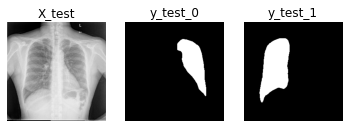

In [7]:
import matplotlib.pyplot as plt

def plotTrainData(a,b,c):
    for i in range(3):
        ix = np.random.randint(0, len(a))
        plt.subplot(1,3,1)
        plt.title("X_" + c)
        plt.imshow(a[ix])
        plt.axis('off')
        plt.subplot(1,3,2)
        plt.title("y_" + c + "_0")
        plt.imshow(b[ix, :, :, 0], 'gray') # squeeze: 1차원 축 제거
        plt.axis('off')
        plt.subplot(1,3,3)
        plt.title("y_" + c + "_1")
        plt.imshow(b[ix, :, :, 1], 'gray') # squeeze: 1차원 축 제거
        plt.axis('off')
        plt.show()
        
plotTrainData(X_train,y_train, 'train')
plotTrainData(X_valid,y_valid, 'valid')
plotTrainData(X_test,y_test, 'test')

![대체 텍스트](https://miro.medium.com/max/875/1*Z1hkDvyhFBogT9EkzVkX2A.png)

* Segmentation에서는 IoU, Dice Coefficient 많이 사용

In [8]:
def dice_coef(y_true, y_pred):
    # reduce_sum: 텐서의 모든 성분의 총합을 계산 Ex. tensor = [[[1, 2, 3]], [[4, 5, 6]]] tf.reduce_sum(tensor) -> 1+2+3+4+5+6 = 21
    # y_true * y_pred -> TP: 실제 True를 True로 예측한 경우
    intersection = tf.reduce_sum(y_true * y_pred) 
    return (2. * intersection + 1) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + 1)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

## 모델 생성

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Add
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Concatenate

def unet(input_size=(256,256,3)):
    inputs = Input(input_size)
    
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPool2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPool2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPool2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = BatchNormalization()(conv4)
    pool4 = MaxPool2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    conv5 = BatchNormalization()(conv5)
    
    up6 = Concatenate()([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4])
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = BatchNormalization()(conv6)
    
    up7 = Concatenate()([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3])
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = BatchNormalization()(conv7)
    
    up8 = Concatenate()([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2])
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = BatchNormalization()(conv8)
    
    up9 = Concatenate()([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1])
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)
    conv9 = BatchNormalization()(conv9)

    # conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)
    conv10 = Conv2D(2, (1, 1), activation='sigmoid')(conv9) # 좌/우를 분리된 이미지를 예측 하기 위해 input값을 2로 변경, mask값이 bool type이라서 activation은 sigmoid를 사용

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
# build the model
from tensorflow.keras.optimizers import SGD

model = unet()
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss=dice_coef_loss, optimizer=sgd, metrics=[dice_coef])
# model.compile(optimizer=sgd, loss='binary_crossentrophy', metrics=['accuracy'])

# fix random seed for reproductibility
seed = 7
np.random.seed(seed)
tf.random.set_seed(seed)

# FIT THE MODEL - OPTIMIZATION
hist = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=8, verbose=1)
model.save('unet.h5')

# 학습과정 살펴보기
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['dice_coef'], 'b', label='train dice_coef')
acc_ax.plot(hist.history['val_dice_coef'], 'g', label='val dice_coef')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('dice_coef')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## 모델 평가

In [11]:
import matplotlib.pyplot as plt

def plotPredictions(X_train_, y_train_, X_valid_, y_valid_, X_test_, y_test_, simpleFCN):
    model = simpleFCN     

    ix = np.random.randint(0, len(X_train_))
    input_ = X_train_[ix:ix+1]
    mask_ = y_train_[ix:ix+1]
    preds_train = model.predict(input_)
    preds_train_t = (preds_train > 0.5).astype(np.uint8)
    plt.figure(figsize=(20,20))
    plt.subplot(1,5,1)
    plt.title("X_train")
    plt.axis('off')
    plt.imshow(input_[0])
    plt.subplot(1,5,2)
    plt.title("Y_train_1")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')
    plt.subplot(1,5,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction_1: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_train_t[0][:,:,0], 'gray')
    plt.subplot(1,5,4)
    plt.title("Y_train_2")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,1], 'gray')      
    plt.subplot(1,5,5)
    # ret = model.evaluate(input_, mask_)
    plt.title("Prediction_2: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_train_t[0][:,:,1], 'gray')
    plt.show()


    ix = np.random.randint(0, len(X_valid_))
    input_ = X_valid_[ix:ix+1]
    mask_ = y_valid_[ix:ix+1]
    preds_valid = model.predict(input_)
    preds_valid_t = (preds_valid > 0.5).astype(np.uint8)
    plt.figure(figsize=(20,20))
    plt.subplot(1,5,1)
    plt.title("X_valid")
    plt.axis('off')
    plt.imshow(input_[0])
    plt.subplot(1,5,2)
    plt.title("Y_valid_1")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')
    plt.subplot(1,5,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction_1: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_valid_t[0][:,:,0], 'gray')
    plt.subplot(1,5,4)
    plt.title("Y_valid_2")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,1], 'gray')      
    plt.subplot(1,5,5)
    # ret = model.evaluate(input_, mask_)
    plt.title("Prediction_2: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_valid_t[0][:,:,1], 'gray')
    plt.show()

    ix = np.random.randint(0, len(X_test_))
    input_ = X_test_[ix:ix+1]
    mask_ = y_test_[ix:ix+1]
    preds_test = model.predict(input_)
    preds_test_t = (preds_test > 0.5).astype(np.uint8)
    plt.figure(figsize=(20,20))
    plt.subplot(1,5,1)
    plt.title("X_test")
    plt.axis('off')
    plt.imshow(input_[0])
    plt.subplot(1,5,2)
    plt.title("Y_test_1")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')
    plt.subplot(1,5,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction_1: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_test_t[0][:,:,0], 'gray')
    plt.subplot(1,5,4)
    plt.title("Y_test_2")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,1], 'gray')      
    plt.subplot(1,5,5)
    # ret = model.evaluate(input_, mask_)
    plt.title("Prediction_2: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_test_t[0][:,:,1], 'gray')
    plt.show()

1/1 [==============================] - 0s 27ms/step - loss: 0.0539 - dice_coef: 0.9461


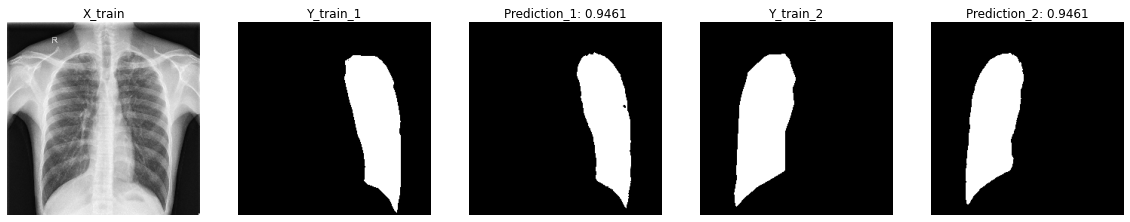

1/1 [==============================] - 0s 28ms/step - loss: 0.0540 - dice_coef: 0.9460


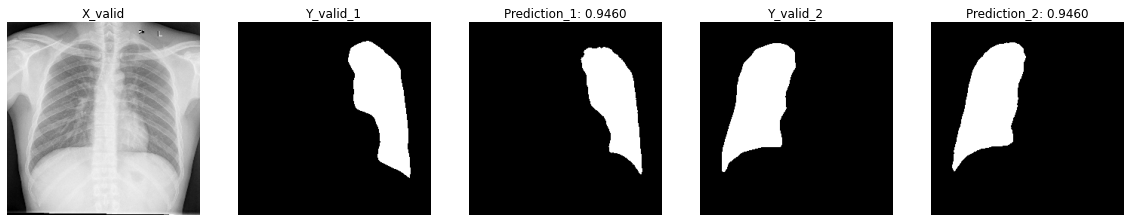

1/1 [==============================] - 0s 30ms/step - loss: 0.0320 - dice_coef: 0.9680


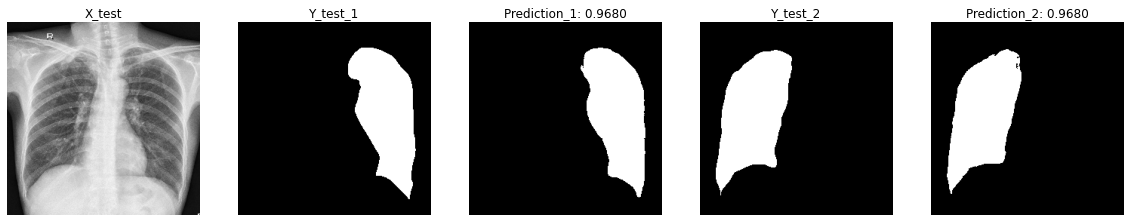

In [12]:
plotPredictions(X_train, y_train, X_valid, y_valid, X_test, y_test, model) 

In [ ]:
# ix = np.random.randint(0, len(X_train))

input_ = X_train[0:1]
# mask_l = y_train[0, : , : ,0]
# mask_r = y_train[0, : , : ,1]

mask_l = y_train[0:1, : , : , 0:1]
#mask_l = np.expand_dims(mask_l, axis=-1)

mask_r = y_train[0:1, : , : , 1:2]
#mask_r = np.expand_dims(mask_r, axis=-1)

print(input_.shape)
print(mask_l.shape)
print(mask_r.shape)

'''
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(mask_l, 'gray') # squeeze: 1차원 축 제거
plt.subplot(1,2,2)
plt.imshow(mask_r, 'gray') # squeeze: 1차원 축 제거
plt.show()
'''
ret_1 = model.evaluate(input_, mask_l)
ret_2 = model.evaluate(input_, mask_r)
ret_total = model.evaluate(input_, y_train[0:1, : , :])
print(f'left: {ret_1[1]} right: {ret_2[1]} total: {ret_total}') #  model.evaluate를 좌/우 구분해서 하면 결과값이 왜 비정상인지?

(1, 256, 256, 3)
(1, 256, 256, 1)
(1, 256, 256, 1)
1/1 [==============================] - 0s 26ms/step - loss: 0.0413 - dice_coef: 0.9587
left: 0.6032323241233826 right: 0.6809872388839722 total: [0.04130512475967407, 0.9586948752403259]
